In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data5=pd.read_csv('input_for_code2/results_smart_stats.csv')
batsman_list1=pd.read_csv('input_for_code2/smart_stats_by_batsman.csv')
bowler_list=pd.read_csv('input_for_code2/smart_stats_by_bowler.csv')

In [3]:

bowler_list['economy_rate']=6*bowler_list['economy_rate']
bowler_list['economy_rate_nominal']=6*bowler_list['economy_rate_nominal']

In [4]:
IS_bat=pd.read_csv('input_for_code2/impact_score_batsman.csv')
IS_bowl=pd.read_csv('input_for_code2/impact_score_bowler.csv')

players=pd.read_csv('input_for_code2/players.csv')

## Generating list of Top 20 Batsmen and Bowlers based on smart Stats

In [5]:
bowler_list1=bowler_list[bowler_list['no_innings_bowled']>=30]
top20_smart_bowl_avg=bowler_list1.sort_values(by='smart_bowl_average',ascending=True).head(20)
top20_smart_bowl_avg.reset_index(drop=True,inplace=True)

name=[]
for i in top20_smart_bowl_avg['bowler_pkey']:
    name.append(players[players['pkey']==i]['first_name'].iloc[0])
name=pd.DataFrame(name)
name
top20_smart_bowl_avg.insert(0,'bowler_name',name[0])

top20_smart_bowl_avg

,bowler_name,bowler_pkey,Smart_wicket,Actual_wicket,no_innings_bowled,smart_runs_conceded,Actual_runs_conceded,balls,no_balls,smart_bowl_average,economy_rate,bowl_average_nominal,economy_rate_nominal
0,Lungi Ngidi,49.0,82.877411,65,36,952.657315,982.0,751,3,11.494777,7.641636,15.107692,7.877005
1,Jasprit Bumrah,119.0,110.664412,91,65,1290.576012,1629.0,1498,6,11.662069,5.189984,17.901099,6.550938
2,Lockie Ferguson,96.0,60.504019,47,32,724.702927,846.0,734,3,11.977765,5.948314,18.000000,6.943912
3,Rashid Khan,63.0,231.481613,187,134,2865.823636,3294.0,3124,1,12.380351,5.505905,17.614973,6.328530
4,Jofra Archer,178.0,167.041369,131,91,2308.575310,2520.0,2127,17,13.820381,6.564669,19.236641,7.165877
5,Imran Tahir,36.0,198.274976,166,116,2765.754617,2900.0,2624,3,13.949086,6.331373,17.469880,6.638688
6,Peter Siddle,687.0,64.510755,52,41,906.934929,986.0,828,3,14.058663,6.595890,18.961538,7.170909
7,Mustafizur Rahman,248.0,90.872658,84,55,1277.830714,1390.0,1199,6,14.061773,6.426642,16.547619,6.990780
8,Blair Tickner,499.0,77.999061,61,38,1114.453241,1130.0,828,3,14.288034,8.105114,18.524590,8.218182
9,Shaheen Afridi,427.0,114.657001,92,61,1654.836234,1673.0,1369,6,14.432928,7.284679,18.184783,7.364637


In [6]:
top20_smart_econ_rate=bowler_list1.sort_values(by='economy_rate',ascending=True).head(20)
top20_smart_econ_rate.reset_index(drop=True,inplace=True)
name=[]
for i in top20_smart_econ_rate['bowler_pkey']:
    name.append(players[players['pkey']==i]['first_name'].iloc[0])
name=pd.DataFrame(name)
name
top20_smart_econ_rate.insert(0,'bowler_name',name[0])
top20_smart_econ_rate

,bowler_name,bowler_pkey,Smart_wicket,Actual_wicket,no_innings_bowled,smart_runs_conceded,Actual_runs_conceded,balls,no_balls,smart_bowl_average,economy_rate,bowl_average_nominal,economy_rate_nominal
0,Jasprit Bumrah,119.0,110.664412,91,65,1290.576012,1629.0,1498,6,11.662069,5.189984,17.901099,6.550938
1,Rashid Khan,63.0,231.481613,187,134,2865.823636,3294.0,3124,1,12.380351,5.505905,17.614973,6.328530
2,Mujeeb Ur Rahman,193.0,122.344567,101,88,1930.952544,2132.0,2038,0,15.782904,5.684846,21.108911,6.276742
3,Sunil Narine,93.0,119.159559,97,101,2218.752804,2518.0,2312,1,18.620015,5.760501,25.958763,6.537430
4,Lockie Ferguson,96.0,60.504019,47,32,724.702927,846.0,734,3,11.977765,5.948314,18.000000,6.943912
5,Wahab Riaz,567.0,138.535013,130,93,2121.637866,2418.0,2072,33,15.314813,6.243172,18.600000,7.115253
6,Keshav Maharaj,510.0,32.214328,26,31,726.807746,728.0,694,0,22.561630,6.283640,28.000000,6.293948
7,Imran Tahir,36.0,198.274976,166,116,2765.754617,2900.0,2624,3,13.949086,6.331373,17.469880,6.638688
8,Chris Green,238.0,80.152708,65,76,1613.575384,1646.0,1515,1,20.131265,6.394618,25.323077,6.523118
9,Mustafizur Rahman,248.0,90.872658,84,55,1277.830714,1390.0,1199,6,14.061773,6.426642,16.547619,6.990780


In [7]:
batsman_list2=batsman_list1[batsman_list1['no_innings']>=30]
top20_smart_bat_avg=batsman_list2.sort_values(by='R',ascending=False).head(20)
top20_smart_bat_avg.reset_index(drop=True,inplace=True)

name=[]
for i in top20_smart_bat_avg['batsman_pkey']:
    name.append(players[players['pkey']==i]['first_name'].iloc[0])
name=pd.DataFrame(name)
name
top20_smart_bat_avg.insert(0,'batsman_name',name[0])
top20_smart_bat_avg

,batsman_name,batsman_pkey,smart_runs,runs,dismissals,balls,no_innings,average_nominal,strike_rate_nominal,R_0_nominal,R_nominal,SA,SSR,R_0,R
0,AB de Villiers,21.0,3412.371715,2963.0,67,1828,84,44.223881,162.089716,0.405224,0.648359,50.930921,186.672413,1.247487,0.746289
1,Devon Conway,637.0,1658.961422,1537.0,28,1079,34,54.892857,142.446710,0.356117,0.569787,59.248622,153.749900,1.230298,0.735107
2,Lokesh Rahul,177.0,3333.758448,2991.0,62,2099,71,48.241935,142.496427,0.356241,0.569986,53.770298,158.826034,1.169813,0.695759
3,Cam Fletcher,3069.0,812.746530,776.0,15,549,32,51.733333,141.347905,0.353370,0.565392,54.183102,148.041262,1.129394,0.669465
4,Andre Russell,90.0,2594.273353,2294.0,70,1267,95,32.771429,181.057616,0.452644,0.724230,37.061048,204.757171,1.116977,0.661387
5,Laurie Evans,924.0,2309.125600,2104.0,46,1518,65,45.739130,138.603426,0.346509,0.554414,50.198383,152.116311,1.087055,0.641921
6,Luke Ronchi,532.0,1876.922198,1539.0,50,966,54,30.780000,159.316770,0.398292,0.637267,37.538444,194.298364,1.078940,0.636642
7,Babar Azam,426.0,3715.158558,3445.0,74,2603,88,46.554054,132.347292,0.330868,0.529389,50.204845,142.726030,1.046552,0.615572
8,Aaron Finch,219.0,3288.764770,2949.0,76,1972,92,38.802632,149.543611,0.373859,0.598174,43.273221,166.773061,1.046222,0.615357
9,Matthew Wade,390.0,1444.333805,1252.0,35,844,37,35.771429,148.341232,0.370853,0.593365,41.266680,171.129598,1.034865,0.607970


In [9]:
top20_smart_bat_avg.to_csv('top20_smart_bat_avg.csv')

In [10]:
top20_smart_econ_rate.to_csv('top20_smart_econ_rate.csv')

In [11]:
top20_smart_bowl_avg.to_csv('top20_smart_bowl_avg.csv')

## Plotting the Random Forest Model for Expected Runs per Balls given Balls Remaining

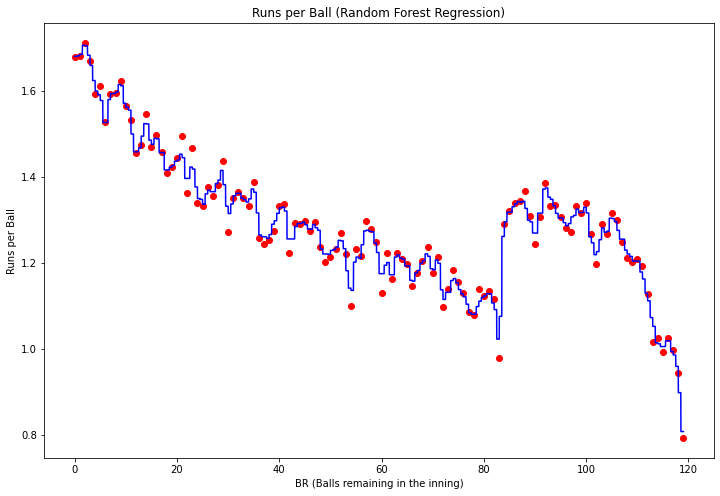

In [24]:
data_rf_runs_per_ball=pd.read_csv('input_for_code2/data_rf_runs_per_ball.csv')

# plotting the random forest model to visualise
# training the random forest model
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 10, random_state = 3)
X=data_rf_runs_per_ball[['BR']]
y=data_rf_runs_per_ball[['runs_per_balls']]
regressor1.fit(X, y)

# plotting the random forest model to visualise
import matplotlib.pyplot as plt

X1=X.to_numpy()
y1=y.to_numpy()
X_grid = np.arange(min(X1), max(X1), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))
f=plt.figure()
f.set_figwidth(12)
f.set_figheight(8)
plt.scatter(X1, y1, color = 'red')
plt.plot(X_grid, regressor1.predict(X_grid), color = 'blue')

plt.title('Runs per Ball (Random Forest Regression)')
plt.xlabel('BR (Balls remaining in the inning)')
plt.ylabel('Runs per Ball')
plt.show()

## Plotting Ball by Ball event of some matches

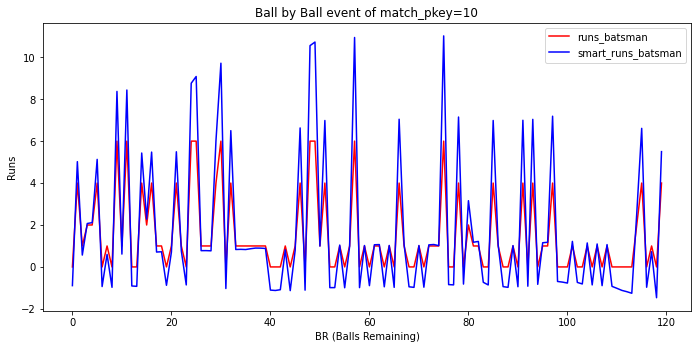

In [8]:
 
data6=data5[data5['BR_unique']>=0][data5['match_pkey']==10][data5['innings']==1]
X=data6[['BR']]
y1=data6[['runs_batsman']]
y2=data6[['smart_runs_batsman']]
fig = plt.figure()
fig.set_figwidth(9)
fig.set_figheight(4)
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Runs')
ax.set_xlabel('BR (Balls Remaining)')
ax.set_title('Ball by Ball event of match_pkey=10')
ax.plot(X, y1, color = 'red',label='runs_batsman')
ax.plot(X, y2, color = 'blue',label='smart_runs_batsman')
ax.legend()

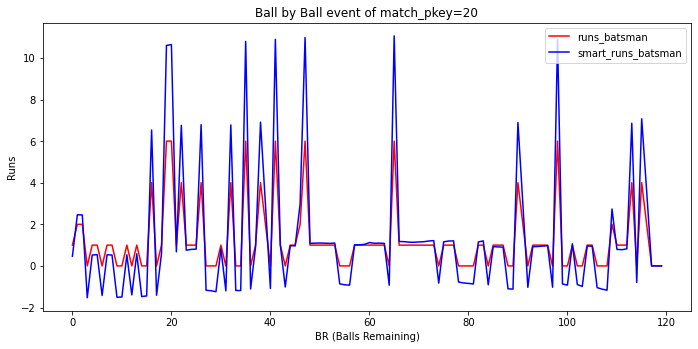

In [9]:
data6=data5[data5['BR_unique']>=0][data5['match_pkey']==20][data5['innings']==1]
X=data6[['BR']]
y1=data6[['runs_batsman']]
y2=data6[['smart_runs_batsman']]
fig = plt.figure()
fig.set_figwidth(9)
fig.set_figheight(4)
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Runs')
ax.set_xlabel('BR (Balls Remaining)')
ax.set_title('Ball by Ball event of match_pkey=20')
ax.plot(X, y1, color = 'red',label='runs_batsman')
ax.plot(X, y2, color = 'blue',label='smart_runs_batsman')
ax.legend()

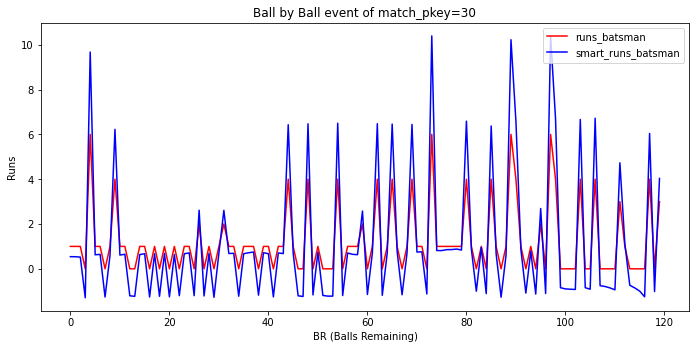

In [10]:
 data6=data5[data5['BR_unique']>=0][data5['match_pkey']==30][data5['innings']==1]
X=data6[['BR']]
y1=data6[['runs_batsman']]
y2=data6[['smart_runs_batsman']]
fig = plt.figure()
fig.set_figwidth(9)
fig.set_figheight(4)
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Runs')
ax.set_xlabel('BR (Balls Remaining)')
ax.set_title('Ball by Ball event of match_pkey=30')
ax.plot(X, y1, color = 'red',label='runs_batsman')
ax.plot(X, y2, color = 'blue',label='smart_runs_batsman')
ax.legend()

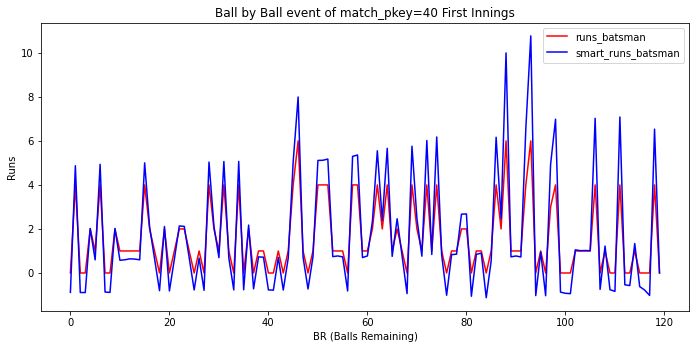

In [11]:
data6=data5[data5['BR_unique']>=0][data5['match_pkey']==40][data5['innings']==1]
X=data6[['BR']]
y1=data6[['runs_batsman']]
y2=data6[['smart_runs_batsman']]
fig = plt.figure()
fig.set_figwidth(9)
fig.set_figheight(4)
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Runs')
ax.set_xlabel('BR (Balls Remaining)')
ax.set_title('Ball by Ball event of match_pkey=40 First Innings')
ax.plot(X, y1, color = 'red',label='runs_batsman')
ax.plot(X, y2, color = 'blue',label='smart_runs_batsman')
ax.legend()

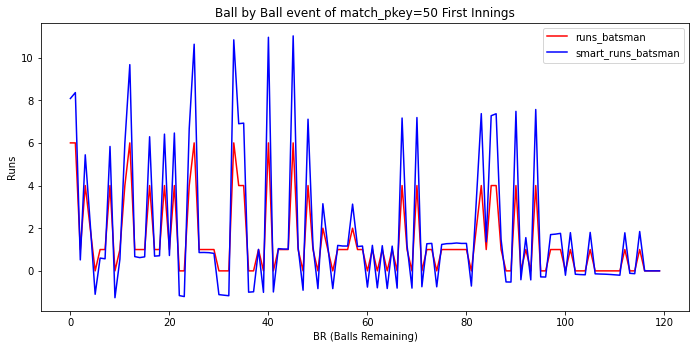

In [12]:
 data6=data5[data5['BR_unique']>=0][data5['match_pkey']==50][data5['innings']==1]
X=data6[['BR']]
y1=data6[['runs_batsman']]
y2=data6[['smart_runs_batsman']]
fig = plt.figure()
fig.set_figwidth(9)
fig.set_figheight(4)
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Runs')
ax.set_xlabel('BR (Balls Remaining)')
ax.set_title('Ball by Ball event of match_pkey=50 First Innings')
ax.plot(X, y1, color = 'red',label='runs_batsman')
ax.plot(X, y2, color = 'blue',label='smart_runs_batsman')
ax.legend()

## Plotting R -value (Rating Score) of Selected Batsmen

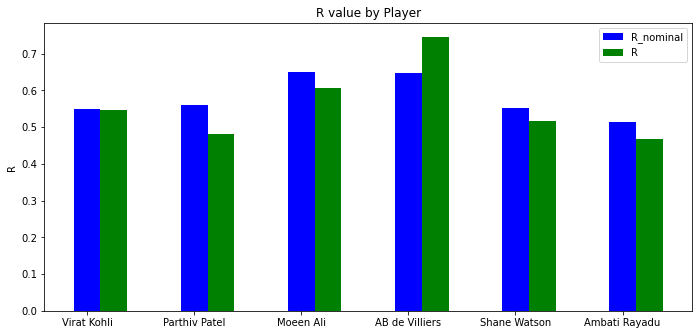

In [13]:
labels = ['Virat Kohli','Parthiv Patel','Moeen Ali','AB de Villiers', 'Shane Watson','Ambati Rayadu']
batsman_list2=batsman_list1[batsman_list1['batsman_pkey'].isin([11,47,12,21,42,27])]
y1=batsman_list2[['R_nominal']].to_numpy()
y2=batsman_list2[['R']].to_numpy()
data = [y1[:,0],y2[:,0]]
X=np.arange(6)
fig = plt.figure()
fig.set_figwidth(9)
#fig.set_figheight(6)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('R')
ax.set_title('R value by Player')
ax.bar(X, data[0], color = 'b', width = 0.25,label='R_nominal')
ax.bar(X+0.25, data[1], color = 'g', width = 0.25,label='R')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()


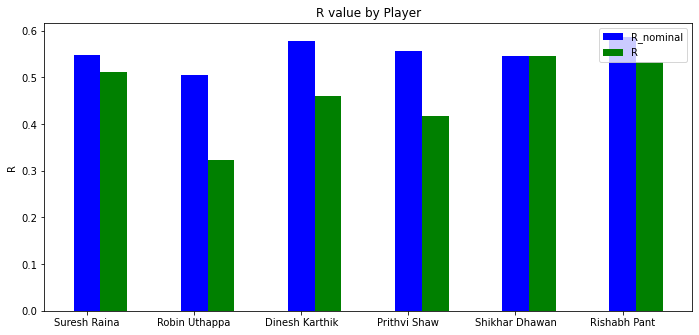

In [14]:
labels = ['Suresh Raina','Robin Uthappa','Dinesh Karthik', 'Prithvi Shaw','Shikhar Dhawan', 'Rishabh Pant']
batsman_list2=batsman_list1[batsman_list1['batsman_pkey'].isin([22,61,97,115,110,136])]
y1=batsman_list2[['R_nominal']].to_numpy()
y2=batsman_list2[['R']].to_numpy()
data = [y1[:,0],y2[:,0]]
X=np.arange(6)
fig = plt.figure()
fig.set_figwidth(9)
#fig.set_figheight(6)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('R')
ax.set_title('R value by Player')
ax.bar(X, data[0], color = 'b', width = 0.25,label='R_nominal')
ax.bar(X+0.25, data[1], color = 'g', width = 0.25,label='R')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()

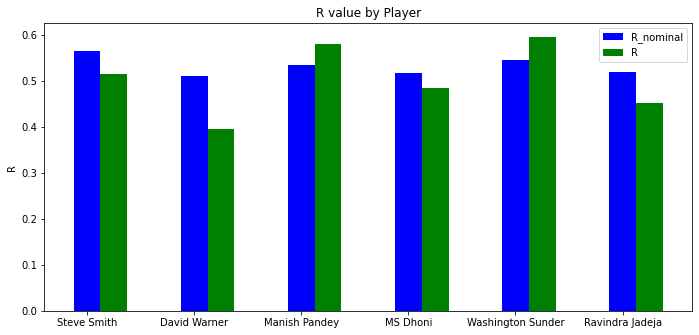

In [15]:
labels = ['Steve Smith','David Warner', 'Manish Pandey', 'MS Dhoni', 'Washington Sunder','Ravindra Jadeja']
batsman_list2=batsman_list1[batsman_list1['batsman_pkey'].isin([170,72,62,23,25,24])]
y1=batsman_list2[['R_nominal']].to_numpy()
y2=batsman_list2[['R']].to_numpy()
data = [y1[:,0],y2[:,0]]
X=np.arange(6)
fig = plt.figure()
fig.set_figwidth(9)
#fig.set_figheight(6)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('R')
ax.set_title('R value by Player')
ax.bar(X, data[0], color = 'b', width = 0.25,label='R_nominal')
ax.bar(X+0.25, data[1], color = 'g', width = 0.25,label='R')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()

## Plotting Batting Average Smart vs Nominal comparison of Selected Batsmen

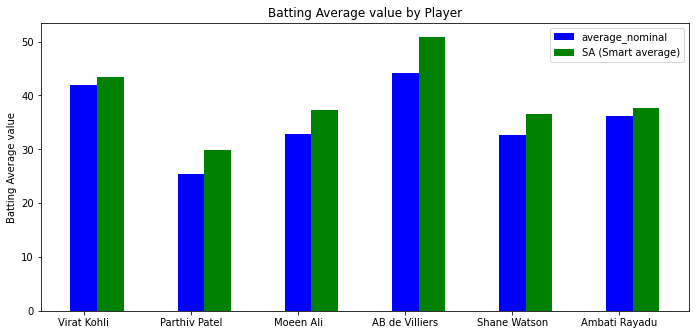

In [16]:
labels = ['Virat Kohli','Parthiv Patel','Moeen Ali','AB de Villiers', 'Shane Watson','Ambati Rayadu']
batsman_list2=batsman_list1[batsman_list1['batsman_pkey'].isin([11,47,12,21,42,27])]
y1=batsman_list2[['average_nominal']].to_numpy()
y2=batsman_list2[['SA']].to_numpy()
data = [y1[:,0],y2[:,0]]
X=np.arange(6)
fig = plt.figure()
fig.set_figwidth(9)
#fig.set_figheight(6)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Batting Average value')
ax.set_title('Batting Average value by Player')
ax.bar(X, data[0], color = 'b', width = 0.25,label='average_nominal')
ax.bar(X+0.25, data[1], color = 'g', width = 0.25,label='SA (Smart average)')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()

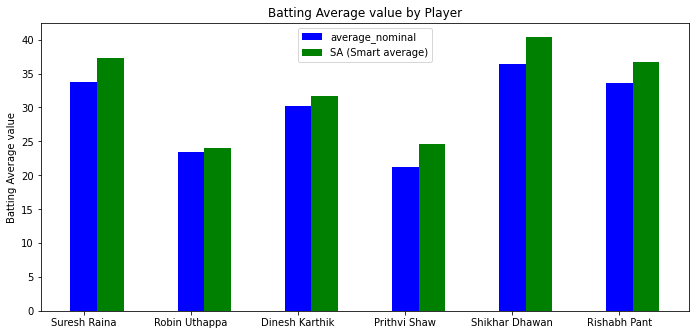

In [17]:
labels = ['Suresh Raina','Robin Uthappa','Dinesh Karthik', 'Prithvi Shaw','Shikhar Dhawan', 'Rishabh Pant']
batsman_list2=batsman_list1[batsman_list1['batsman_pkey'].isin([22,61,97,115,110,136])]
y1=batsman_list2[['average_nominal']].to_numpy()
y2=batsman_list2[['SA']].to_numpy()
data = [y1[:,0],y2[:,0]]
X=np.arange(6)
fig = plt.figure()
fig.set_figwidth(9)
#fig.set_figheight(6)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Batting Average value')
ax.set_title('Batting Average value by Player')
ax.bar(X, data[0], color = 'b', width = 0.25,label='average_nominal')
ax.bar(X+0.25, data[1], color = 'g', width = 0.25,label='SA (Smart average)')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()

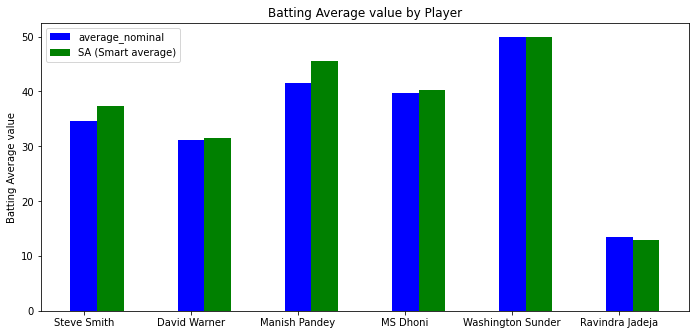

In [18]:
labels = ['Steve Smith','David Warner', 'Manish Pandey', 'MS Dhoni', 'Washington Sunder','Ravindra Jadeja']
batsman_list2=batsman_list1[batsman_list1['batsman_pkey'].isin([170,72,62,23,25,24])]
y1=batsman_list2[['average_nominal']].to_numpy()
y2=batsman_list2[['SA']].to_numpy()
data = [y1[:,0],y2[:,0]]
X=np.arange(6)
fig = plt.figure()
fig.set_figwidth(9)
#fig.set_figheight(6)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Batting Average value')
ax.set_title('Batting Average value by Player')
ax.bar(X, data[0], color = 'b', width = 0.25,label='average_nominal')
ax.bar(X+0.25, data[1], color = 'g', width = 0.25,label='SA (Smart average)')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()

## Plotting Batting Strike Rate Smart vs Nominal comparison of Selected Batsmen

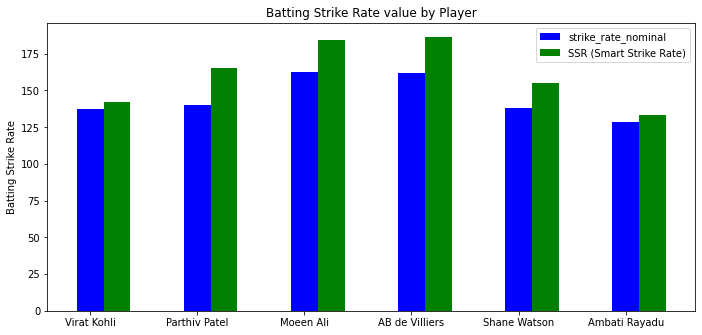

In [19]:
labels = ['Virat Kohli','Parthiv Patel','Moeen Ali','AB de Villiers', 'Shane Watson','Ambati Rayadu']
batsman_list2=batsman_list1[batsman_list1['batsman_pkey'].isin([11,47,12,21,42,27])]
y1=batsman_list2[['strike_rate_nominal']].to_numpy()
y2=batsman_list2[['SSR']].to_numpy()
data = [y1[:,0],y2[:,0]]
X=np.arange(6)
fig = plt.figure()
fig.set_figwidth(9)
#fig.set_figheight(6)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Batting Strike Rate')
ax.set_title('Batting Strike Rate value by Player')
ax.bar(X, data[0], color = 'b', width = 0.25,label='strike_rate_nominal')
ax.bar(X+0.25, data[1], color = 'g', width = 0.25,label='SSR (Smart Strike Rate)')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()

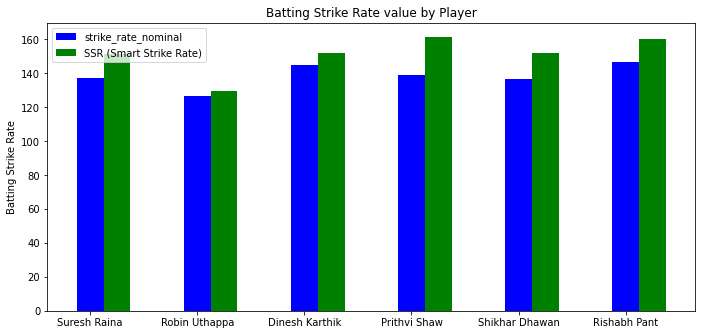

In [20]:
labels = ['Suresh Raina','Robin Uthappa','Dinesh Karthik', 'Prithvi Shaw','Shikhar Dhawan', 'Rishabh Pant']
batsman_list2=batsman_list1[batsman_list1['batsman_pkey'].isin([22,61,97,115,110,136])]
y1=batsman_list2[['strike_rate_nominal']].to_numpy()
y2=batsman_list2[['SSR']].to_numpy()
data = [y1[:,0],y2[:,0]]
X=np.arange(6)
fig = plt.figure()
fig.set_figwidth(9)
#fig.set_figheight(6)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Batting Strike Rate')
ax.set_title('Batting Strike Rate value by Player')
ax.bar(X, data[0], color = 'b', width = 0.25,label='strike_rate_nominal')
ax.bar(X+0.25, data[1], color = 'g', width = 0.25,label='SSR (Smart Strike Rate)')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()

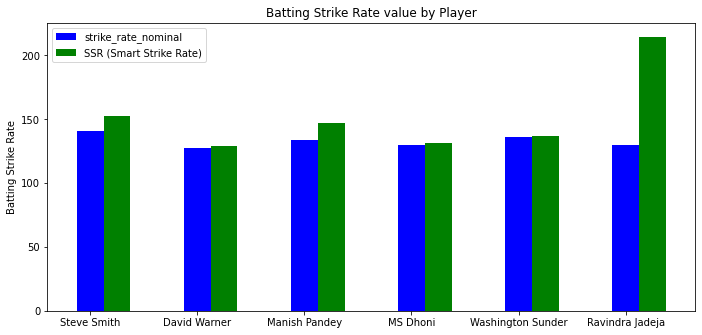

In [21]:
labels = ['Steve Smith','David Warner', 'Manish Pandey', 'MS Dhoni', 'Washington Sunder','Ravindra Jadeja']
batsman_list2=batsman_list1[batsman_list1['batsman_pkey'].isin([170,72,62,23,24,25])]
y1=batsman_list2[['strike_rate_nominal']].to_numpy()
y2=batsman_list2[['SSR']].to_numpy()
data = [y1[:,0],y2[:,0]]
X=np.arange(6)
fig = plt.figure()
fig.set_figwidth(9)
#fig.set_figheight(6)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Batting Strike Rate')
ax.set_title('Batting Strike Rate value by Player')
ax.bar(X, data[0], color = 'b', width = 0.25,label='strike_rate_nominal')
ax.bar(X+0.25, data[1], color = 'g', width = 0.25,label='SSR (Smart Strike Rate)')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()

# Plotting Smart Economy Rate vs Nominal Economy Rate comparison of Selected Bowlers

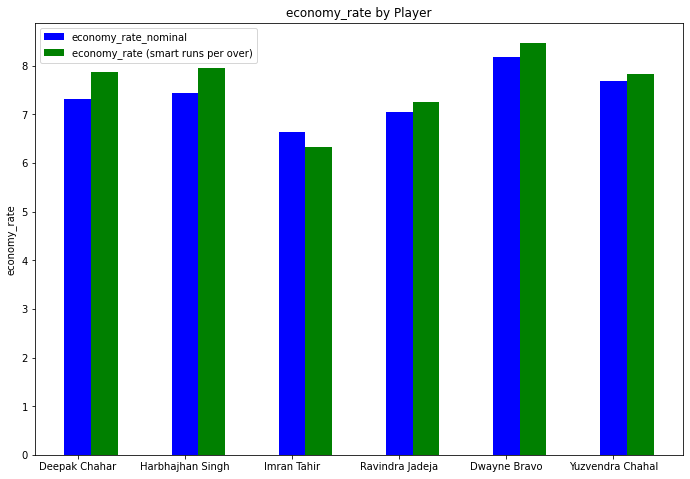

In [22]:
labels = ['Deepak Chahar','Harbhajhan Singh','Imran Tahir','Ravindra Jadeja','Dwayne Bravo','Yuzvendra Chahal']
bowler_list2=bowler_list[bowler_list['bowler_pkey'].isin([2,30,36,24,41,39])]
y1=bowler_list2[['economy_rate_nominal']].to_numpy()
y2=bowler_list2[['economy_rate']].to_numpy()
data = [y1[:,0],y2[:,0]]
X=np.arange(6)
fig = plt.figure()
fig.set_figwidth(9)
fig.set_figheight(6)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('economy_rate')
ax.set_title('economy_rate by Player')
ax.bar(X, data[0], color = 'b', width = 0.25,label='economy_rate_nominal')
ax.bar(X+0.25, data[1], color = 'g', width = 0.25,label='economy_rate (smart runs per over)')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()

## Plotting Smart Bowling Average vs Nominal Bowling Average comparison of Selected Bowlers

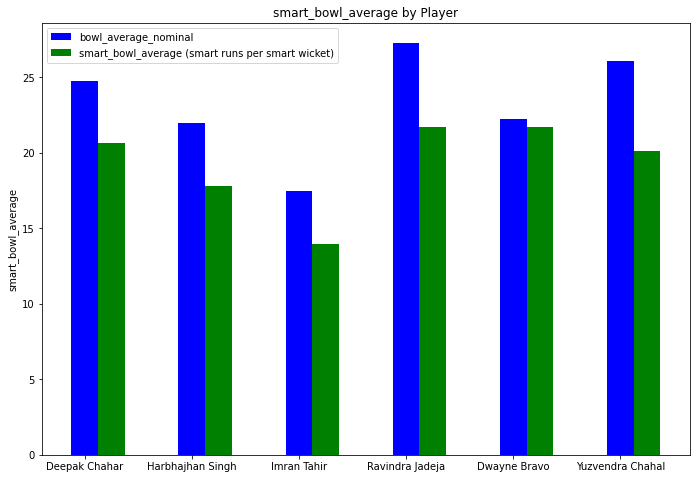

In [23]:
labels = ['Deepak Chahar','Harbhajhan Singh','Imran Tahir','Ravindra Jadeja','Dwayne Bravo','Yuzvendra Chahal']
bowler_list2=bowler_list[bowler_list['bowler_pkey'].isin([2,30,36,24,41,39])]
y1=bowler_list2[['bowl_average_nominal']].to_numpy()
y2=bowler_list2[['smart_bowl_average']].to_numpy()
data = [y1[:,0],y2[:,0]]
X=np.arange(6)
fig = plt.figure()
fig.set_figwidth(9)
fig.set_figheight(6)
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('smart_bowl_average')
ax.set_title('smart_bowl_average by Player')
ax.bar(X, data[0], color = 'b', width = 0.25,label='bowl_average_nominal')
ax.bar(X+0.25, data[1], color = 'g', width = 0.25,label='smart_bowl_average (smart runs per smart wicket)')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()